In [1]:
#importing the libraries
import numpy as np #for mathematical calculations
import cv2 #for face detection and other image operations
import dlib #for detection of facial landmarks ex:nose,jawline,eyes
from sklearn.cluster import KMeans #for clustering
from matplotlib import pyplot as plt
from os import walk
import pandas as pd
import math
from math import degrees
import imutils
import glob
import datetime
import shutil
import os

In [17]:
fileList = glob.glob('./INPUT2/*/*/*/*/C7.jpg')

In [18]:
len(fileList)
# #fileList

# # OUYPUY/MASK_19062431-S00-L1-E01-C7.jpg
# # INPUT/19062431-S00-L1-E01-C7.jpg
# fileList[0].replace("./INPUT","").replace("\\","-")

3240

2607
2609
2610
2611
2612
2613
2615
2619
2620
2621
2624
2640
2643
2644
2645
2654
2655
2656
2657
2658
2659
2660
2676
2677
2678
2682
2683
2684
2685
2686
2687
2688
2689
2690
2694
2695
2696
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2717
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2754
2755
2757
2758
2759
2766
2767
2768
2772
2773
2774
2775
2776
2777
2778
2779
2780
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2847
2848
2856
2857
2858
2862
2863
2864
2865
2866
2867
2868
2869
2870
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2889
2891
2893
2894
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2932
2935
2946
2947
2948
2952
2953
2954
2955
2956


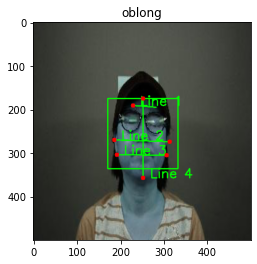

In [20]:
result = pd.DataFrame(columns=['rawImagePath','outImagePath','detectFace','faceClass','landmarkPoint'])
face_cascade_path = "./haarcascade_frontalface_default.xml"
predictor_path = "./shape_predictor_68_face_landmarks.dat"

choice1 = (239, 207, 137)
choice2 = 1

for i3 in range(2600,3240):
    
    #print(i)
    dataL3 = pd.DataFrame()

    #load the image   
    imagepath = fileList[i3]
    org_path = "./OUTPUT/ORG/ORG" + fileList[i3].replace("./INPUT","").replace("\\","-")
    outPath = "./OUTPUT/FACE/FACE" + fileList[i3].replace("./INPUT","").replace("\\","-")
    outPath_mask = "./OUTPUT/MASK/MASK" + fileList[i3].replace("./INPUT","").replace("\\","-")
    
    org_path_with_google = "http://210.178.19.87:9080/IMG/SERVICE5/ORG" + fileList[i3].replace("./INPUT","").replace("\\","-")
    outPath_with_google = "http://210.178.19.87:9080/IMG/SERVICE5/FACE" + fileList[i3].replace("./INPUT","").replace("\\","-")
    outPath_mask_with_google = "http://210.178.19.87:9080/IMG/SERVICE5/MASK" + fileList[i3].replace("./INPUT","").replace("\\","-")
    
    #create the haar cascade for detecting face and smile
    faceCascade = cv2.CascadeClassifier(face_cascade_path)

    #create the landmark predictor
    predictor = dlib.shape_predictor(predictor_path)

    #read the image
    image = cv2.imread(imagepath)

    #resizing the image to 000 cols nd 500 rows
    image = cv2.resize(image, (500, 500)) 
    #making another copy
    original = image.copy()

    #convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #apply a Gaussian blur with a 3 x 3 kernel to help remove high frequency noise
    gauss = cv2.GaussianBlur(gray,(3,3), 0)

    #Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gauss,
        scaleFactor=1.05,
        minNeighbors=5,
        minSize=(100,100),
        flags=cv2.CASCADE_SCALE_IMAGE
        )

    #Detect faces in the image
    #print("found {0} faces!".format(len(faces)) )
    
    if(len(faces) != 1):
        result = result.append({'rawImagePath': imagepath,
                                'outImagePath': "",
                                'detectFace' : len(faces),
                                'faceClass' : "",
                               'landmarkPoint' : ""}, ignore_index=True)
        continue
        
    for (x,y,w,h) in faces:
        #draw a rectangle around the faces
        cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)
        #converting the opencv rectangle coordinates to Dlib rectangle
        dlib_rect = dlib.rectangle(int(x), int(y), int(x+w), int(y+h))
        #detecting landmarks
        detected_landmarks = predictor(image, dlib_rect).parts()
        #converting to np matrix
        landmarks = np.matrix([[p.x,p.y] for p in detected_landmarks])
        #landmarks array contains indices of landmarks.
        """
        #copying the image so we can we side by side
        landmark = image.copy()
        for idx, point in enumerate(landmarks):
                pos = (point[0,0], point[0,1] )
                #annotate the positions
                cv2.putText(landmark,str(idx),pos,fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.4,color=(0,0,255) )
                #draw points on the landmark positions 
                cv2.circle(landmark, pos, 3, color=(0,255,255))

    cv2.imshow("Landmarks by DLib", landmark)
    """
    #making another copy  for showing final results
    results = original.copy()

    for (x,y,w,h) in faces:
        #draw a rectangle around the faces
        cv2.rectangle(results, (x,y), (x+w,y+h), (0,255,0), 2)
        #making temporary copy
        temp = original.copy()
        #getting area of interest from image i.e., forehead (25% of face)
        forehead = temp[y:y+int(0.25*h), x:x+w]
        rows,cols, bands = forehead.shape
        X = forehead.reshape(rows*cols,bands)
        """
        Applying kmeans clustering algorithm for forehead with 2 clusters 
        this clustering differentiates between hair and skin (thats why 2 clusters)
        """
        #kmeans
        kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10, random_state=0)
        y_kmeans = kmeans.fit_predict(X)
        for i in range(0,rows):
            for j in range(0,cols):
                if y_kmeans[i*cols+j]==True:
                    forehead[i][j]=[255,255,255]
                if y_kmeans[i*cols+j]==False:
                    forehead[i][j]=[0,0,0]
        #Steps to get the length of forehead
        #1.get midpoint of the forehead
        #2.travel left side and right side
        #the idea here is to detect the corners of forehead which is the hair.
        #3.Consider the point which has change in pixel value (which is hair)
        forehead_mid = [int(cols/2), int(rows/2) ] #midpoint of forehead
        lef=0 
        #gets the value of forehead point
        pixel_value = forehead[forehead_mid[1],forehead_mid[0] ]
        
        try:
            for i in range(0,cols):
                #enters if when change in pixel color is detected
                if forehead[forehead_mid[1],forehead_mid[0]-i].all()!=pixel_value.all():
                    lef=forehead_mid[0]-i
                    break;
            left = [lef,forehead_mid[1]]
            rig=0
            for i in range(0,cols):
                #enters if when change in pixel color is detected
                if forehead[forehead_mid[1],forehead_mid[0]+i].all()!=pixel_value.all():
                    rig = forehead_mid[0]+i
                    break;
            right = [rig,forehead_mid[1]]
        except:
            result = result.append({'rawImagePath': imagepath,
                                'outImagePath': outPath,
                                'detectFace' : len(faces),
                                'faceClass' : "ERROR",
                               'landmarkPoint' : ""}, ignore_index=True)

    #drawing line1 on forehead with circles
    #specific landmarks are used. 
    line1 = np.subtract(right+y,left+x)[0]
    cv2.line(results, tuple(x+left), tuple(y+right), color=(0,255,0), thickness = 2)
    cv2.putText(results,' Line 1',tuple(x+left),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,color=(0,255,0), thickness=2)
    cv2.circle(results, tuple(x+left), 5, color=(255,0,0), thickness=-1)        

    #drawing line 2 with circles
    linepointleft = (landmarks[1,0],landmarks[1,1])
    linepointright = (landmarks[15,0],landmarks[15,1])
    line2 = np.subtract(linepointright,linepointleft)[0]
    cv2.line(results, linepointleft,linepointright,color=(0,255,0), thickness = 2)
    cv2.putText(results,' Line 2',linepointleft,fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,color=(0,255,0), thickness=2)
    cv2.circle(results, linepointleft, 5, color=(255,0,0), thickness=-1)    
    cv2.circle(results, linepointright, 5, color=(255,0,0), thickness=-1)    

    #drawing line 3 with circles
    linepointleft = (landmarks[3,0],landmarks[3,1])
    linepointright = (landmarks[13,0],landmarks[13,1])
    line3 = np.subtract(linepointright,linepointleft)[0]
    cv2.line(results, linepointleft,linepointright,color=(0,255,0), thickness = 2)
    cv2.putText(results,' Line 3',linepointleft,fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,color=(0,255,0), thickness=2)
    cv2.circle(results, linepointleft, 5, color=(255,0,0), thickness=-1)    
    cv2.circle(results, linepointright, 5, color=(255,0,0), thickness=-1)    

    #drawing line 4 with circles
    linepointbottom = (landmarks[8,0],landmarks[8,1])
    linepointtop = (landmarks[8,0],y)
    line4 = np.subtract(linepointbottom,linepointtop)[1]
    cv2.line(results,linepointtop,linepointbottom,color=(0,255,0), thickness = 2)
    cv2.putText(results,' Line 4',linepointbottom,fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,color=(0,255,0), thickness=2)
    cv2.circle(results, linepointtop, 5, color=(255,0,0), thickness=-1)    
    cv2.circle(results, linepointbottom, 5, color=(255,0,0), thickness=-1)    
    #print(line1,line2,line3,line4)

    similarity = np.std([line1,line2,line3])
    #print("similarity=",similarity)
    ovalsimilarity = np.std([line2,line4])
    #print('diam=',ovalsimilarity)

    #we use arcustangens for angle calculation
    ax,ay = landmarks[3,0],landmarks[3,1]
    bx,by = landmarks[4,0],landmarks[4,1]
    cx,cy = landmarks[5,0],landmarks[5,1]
    dx,dy = landmarks[6,0],landmarks[6,1]
    
    alpha0 = math.atan2(cy-ay,cx-ax)
    alpha1 = math.atan2(dy-by,dx-bx)
    alpha = alpha1-alpha0
    angle = abs(degrees(alpha))
    angle = 180-angle

    faceType = ""
    
    for ii in range(1):
        if similarity<10:
            if angle<160:
                faceType = "squared"
                faceNo = 1
                result = result.append({'rawImagePath': imagepath,
                                'outImagePath': outPath,
                                'detectFace' : len(faces),
                                'faceClass' : faceType,
                               'landmarkPoint' : landmarks}, ignore_index=True)
                break
            else:
                faceType = "round"
                faceNo = 2
                result = result.append({'rawImagePath': imagepath,
                                'outImagePath': outPath,
                                'detectFace' : len(faces),
                                'faceClass' : faceType,
                               'landmarkPoint' : landmarks}, ignore_index=True)
                break
                
        if line3>line1:
            if angle<160:
                faceType = "triangle"
                faceNo = 3
                result = result.append({'rawImagePath': imagepath,
                                'outImagePath': outPath,
                                'detectFace' : len(faces),
                                'faceClass' : faceType,
                               'landmarkPoint' : landmarks}, ignore_index=True)
                break

        if ovalsimilarity<10:
            
            faceType = "diamond"
            faceNo = 4
            result = result.append({'rawImagePath': imagepath,
                                'outImagePath': outPath,
                                'detectFace' : len(faces),
                                'faceClass' : faceType,
                               'landmarkPoint' : landmarks}, ignore_index=True)
            break        
        if line4 > line2:
            if angle<160:
                faceType = "rectangular"
                faceNo = 5
                result = result.append({'rawImagePath': imagepath,
                                'outImagePath': outPath,
                                'detectFace' : len(faces),
                                'faceClass' : faceType,
                               'landmarkPoint' : landmarks}, ignore_index=True)
                break;
            else:
                faceType = "oblong"
                faceNo = 6
                result = result.append({'rawImagePath': imagepath,
                                'outImagePath': outPath,
                                'detectFace' : len(faces),
                                'faceClass' : faceType,
                               'landmarkPoint' : landmarks}, ignore_index=True)
                break;

        print("Damn! Contact the developer")
        
    #output = np.concatenate((results), axis=1)
    
    ############################################################################################################################################
    img = cv2.imread(imagepath)
    img = imutils.resize(img, width = 500)
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #  initialization dlib Face detector 
    detector = dlib.get_frontal_face_detector()
    
        
    """
    Detect faces in grayscale images and create an object - Stores a list of coordinates for the bounding rectangle
    In the second parameter “1” Indicates that the image should be sampled up 1 Time . 
    This makes the image bigger , And allow us to detect more faces
    """
    faces = detector(gray, 1)
    
    if( len(faces) != 1):
        continue
    
        
    
    #  File path 
    p = "shape_predictor_68_face_landmarks.dat"

    predictor = dlib.shape_predictor(p)
    #  Use predictors to get shapes 
    for face in faces:
        landmarks = predictor(gray, face)

    points = []
    
    try:
        for i in range(1, 16):
            point = [landmarks.part(i).x, landmarks.part(i).y]
            points.append(point)

            # print(points).
            #  wide , High coverage masks 
            mask_a = [((landmarks.part(42).x), (landmarks.part(15).y)),
                      ((landmarks.part(27).x), (landmarks.part(27).y)),
                      ((landmarks.part(39).x), (landmarks.part(1).y))]
            #  wide , In the middle of the mask 
            mask_c = [((landmarks.part(29).x), (landmarks.part(29).y))]
            #  wide 、 Low coverage masks 
            mask_e = [((landmarks.part(35).x), (landmarks.part(35).y)),
                      ((landmarks.part(34).x), (landmarks.part(34).y)),
                      ((landmarks.part(33).x), (landmarks.part(33).y)),
                      ((landmarks.part(32).x), (landmarks.part(32).y)),
                      ((landmarks.part(31).x), (landmarks.part(31).y))]
            fmask_a = points + mask_a
            fmask_c = points + mask_c
            fmask_e = points + mask_e
            # mask_type = {1: fmask_a, 2: fmask_c, 3: fmask_e}
            # mask_type[choice2]
            #  Use Python OpenCV - cv2.polylines() Method is [mask_type] Draw the mask outline :
            # fmask_a = wide, high coverage mask,
            # fmask_c = wide, medium coverage mask,
            # fmask_e  = wide, low coverage mask
            fmask_a = np.array(fmask_a, dtype=np.int32)
            fmask_c = np.array(fmask_c, dtype=np.int32)
            fmask_e = np.array(fmask_e, dtype=np.int32)
            mask_type = {1: fmask_a, 2: fmask_c, 3: fmask_e}
            mask_type[choice2]
            #  Change parameters [mask_type] and color_type For various combinations 
            img2 = cv2.polylines(img, [mask_type[choice2]], True, choice1, thickness=2, lineType=cv2.LINE_8)
            #  Use Python OpenCV - cv2.fillPoly() How to fill the mask 
            #  Change parameters [mask_type] and color_type For various combinations 
            img3 = cv2.fillPoly(img2, [mask_type[choice2]], choice1, lineType=cv2.LINE_AA)
    except:
        continue
        
    # print(i3)
    #if(os.path.isfile(outPath) == True and os.path.isfile(outPath_mask) == True):
    #    print(i3)
    #    no = no + 1
    #    dict = {
    #        'NO' : [i3]
    #        , 'FACE_NO': [faceNo]
    #        , 'FACE_TYPE': [faceType.replace("shape","")]
    #        , 'MASK_YN': ['N']
    #        , 'IMG_HOR_SIZE': [img.shape[0]]
    #        , 'IMG_VER_SIZE': [img.shape[1]]
    #        , 'IMG_EXT': ["jpg"]
    #        , 'FRHD_LINE': [line1]
    #        , 'CNTR_LINE': [line2]
    #        , 'PHLT_LINE': [line3]
    #        , 'CHIN_LINE': [line4]
    #        , 'REG_DATE' : [str(datetime.datetime.now())[0:10]]
    #        , 'MOD_DATE' : [str(datetime.datetime.now())[0:10]]
    #        , 'MASK_TYPE' : [choice2]
    #        , 'ORG_IMG_URL': [org_path_with_google]
    #        , 'FACE_IMG_URL' : [outPath_with_google]
    #        , 'MASK_IMG_URL' : [outPath_mask_with_google]
    #        , 'FACE_COORD' : [str(landmarks.parts()).replace("points","")]
    #        , 'MASK_COORD' : [str(mask_type[choice2]).replace("\n","")]
    #    }


    #   dataL3 = dataL3.append(pd.DataFrame.from_dict(dict))
        
    #    if(os.path.isfile("./SERVICE5_RESULT_DATA.csv") == False):
    #        dataL3.to_csv("./SERVICE5_RESULT_DATA.csv",index = False,header=True)
    #    else:
    #        dataL3.to_csv("./SERVICE5_RESULT_DATA.csv",mode="a",index = False,header=False)
    #    continue
        
    ##################################################################
    cv2.imwrite(outPath_mask, img3)
    shutil.copyfile( imagepath , org_path )
    
    plt.imshow(results)
    plt.title(faceType)
    plt.savefig(outPath, bbox_inches='tight')
    cv2.imwrite(outPath_mask, img3)
    ##################################################################
    
    print(i3)
    dict = {
            'NO' : [i3]
            , 'FACE_NO': [faceNo]
            , 'FACE_TYPE': [faceType.replace("shape","")]
            , 'MASK_YN': ['N']
            , 'IMG_HOR_SIZE': [img.shape[0]]
            , 'IMG_VER_SIZE': [img.shape[1]]
            , 'IMG_EXT': ["jpg"]
            , 'FRHD_LINE': [line1]
            , 'CNTR_LINE': [line2]
            , 'PHLT_LINE': [line3]
            , 'CHIN_LINE': [line4]
            , 'REG_DATE' : [str(datetime.datetime.now())[0:10]]
            , 'MOD_DATE' : [str(datetime.datetime.now())[0:10]]
            , 'MASK_TYPE' : [choice2]
            , 'ORG_IMG_URL': [org_path_with_google]
            , 'FACE_IMG_URL' : [outPath_with_google]
            , 'MASK_IMG_URL' : [outPath_mask_with_google]
            , 'FACE_COORD' : [str(landmarks.parts()).replace("points","")]
            , 'MASK_COORD' : [str(mask_type[choice2]).replace("\n","")]
        }

    dataL3 = dataL3.append(pd.DataFrame.from_dict(dict))
    if(os.path.isfile("./OUTPUT/CSV/SERVICE5_RESULT_DATA2.csv") == False):
        dataL3.to_csv("./OUTPUT/CSV/SERVICE5_RESULT_DATA2.csv",index = False,header=True)
    else:
        dataL3.to_csv("./OUTPUT/CSV/SERVICE5_RESULT_DATA2.csv",mode="a",index = False,header=False)
    continue
        
    #plt.imshow(outputNameofImage)
    #plt.show()
    